(1200, 28)
Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')
  EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            

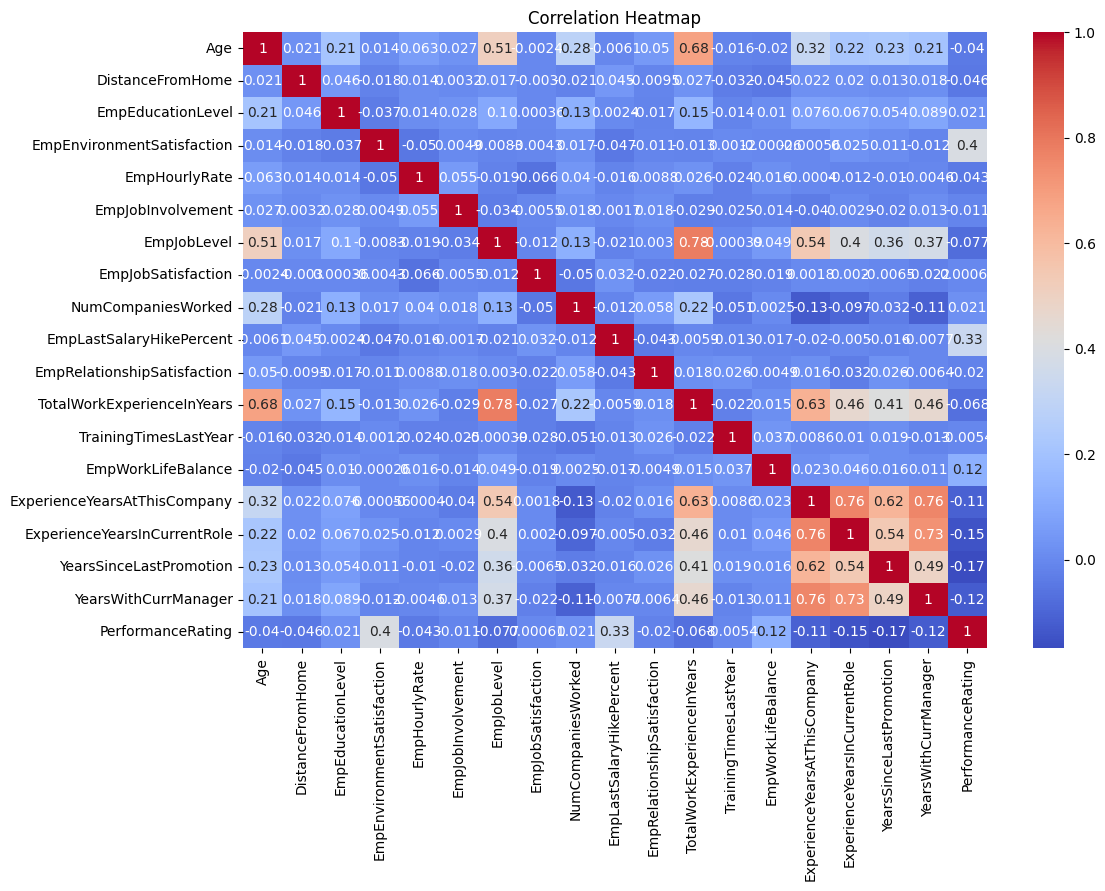

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the processed data
df_dept = pd.read_csv('../../data/processed/raw_with_department.csv')

# Basic structure
print(df_dept.shape)
print(df_dept.columns)

# Preview the dataset
print(df_dept.head())

# Summary statistics
print(df_dept.describe())
print(df_dept.isnull().sum())

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df_dept.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

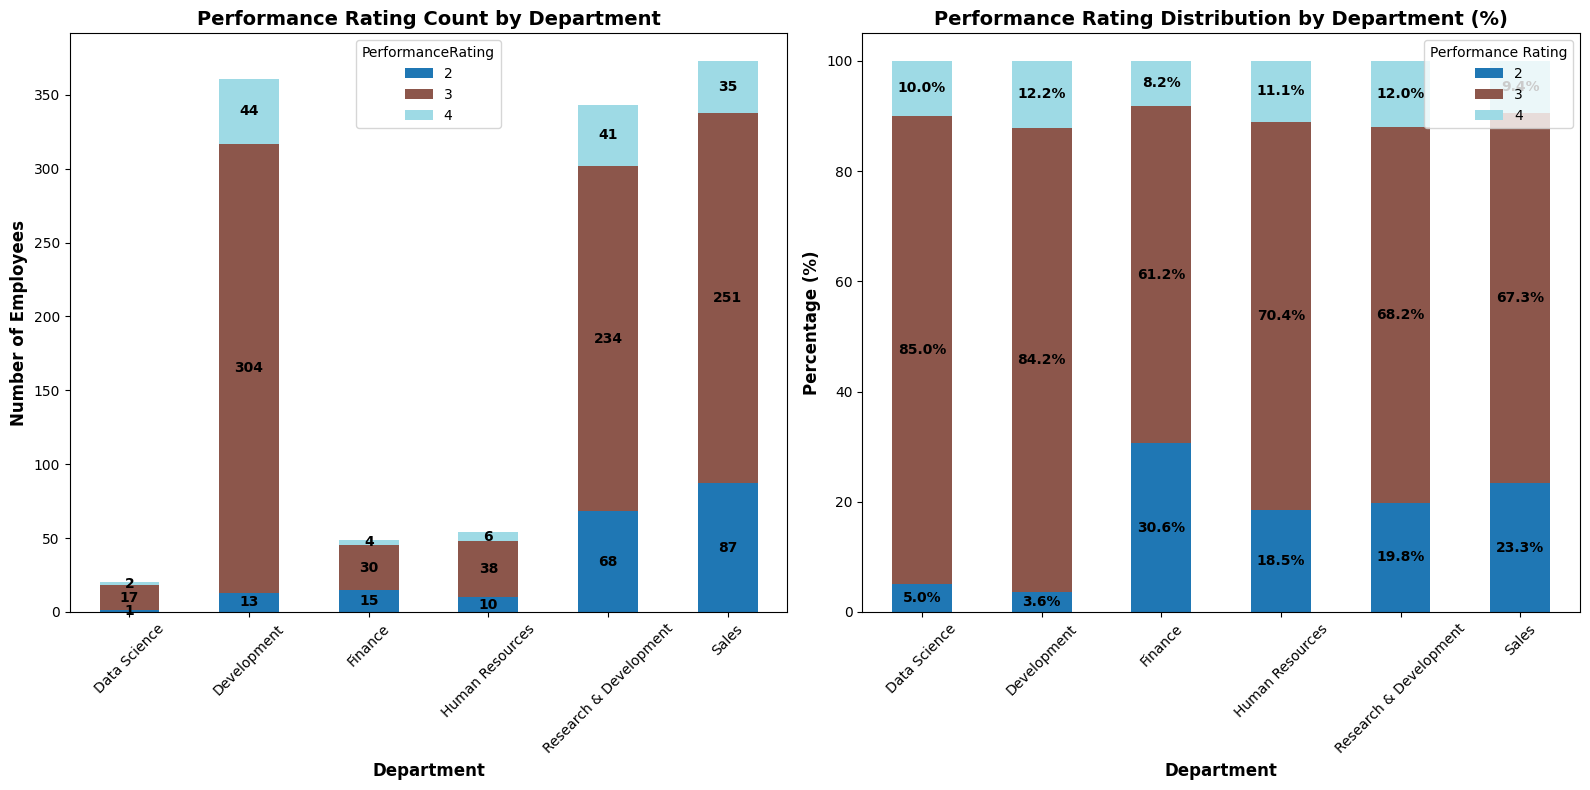

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Count chart (left)
ct = pd.crosstab(df_dept['EmpDepartment'], df_dept['PerformanceRating'])
ct.plot(kind='bar', stacked=True, ax=ax[0], colormap='tab20')
ax[0].set_title('Performance Rating Count by Department', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Department', fontsize=12, fontweight='bold')
ax[0].set_ylabel('Number of Employees', fontsize=12, fontweight='bold')
ax[0].tick_params(axis='x', rotation=45)

# Annotate counts on each stacked segment
for i, dept in enumerate(ct.index):
    cumulative = 0
    for rating in ct.columns:
        count = ct.loc[dept, rating]
        if count > 0:
            ax[0].text(i, cumulative + count / 2, str(count),
                       ha='center', va='center', fontsize=10, fontweight='bold')
        cumulative += count

# Percentage chart (right)
ct_pct = ct.div(ct.sum(axis=1), axis=0) * 100
ct_pct.plot(kind='bar', stacked=True, ax=ax[1], colormap='tab20')
ax[1].set_title('Performance Rating Distribution by Department (%)', fontsize=14, fontweight='bold')
ax[1].set_xlabel('Department', fontsize=12, fontweight='bold')
ax[1].set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
ax[1].tick_params(axis='x', rotation=45)
ax[1].legend(title='Performance Rating', loc='upper right')
# Annotate percentage inside each stacked segment
for i, dept in enumerate(ct_pct.index):
    cumulative = 0
    for rating in ct_pct.columns:
        pct = ct_pct.loc[dept, rating]
        if pct > 3:  # Only label if big enough to show
            ax[1].text(i, cumulative + pct / 2, f"{pct:.1f}%",
                       ha='center', va='center', fontsize=10, fontweight='bold')
        cumulative += pct

plt.tight_layout()
plt.show()


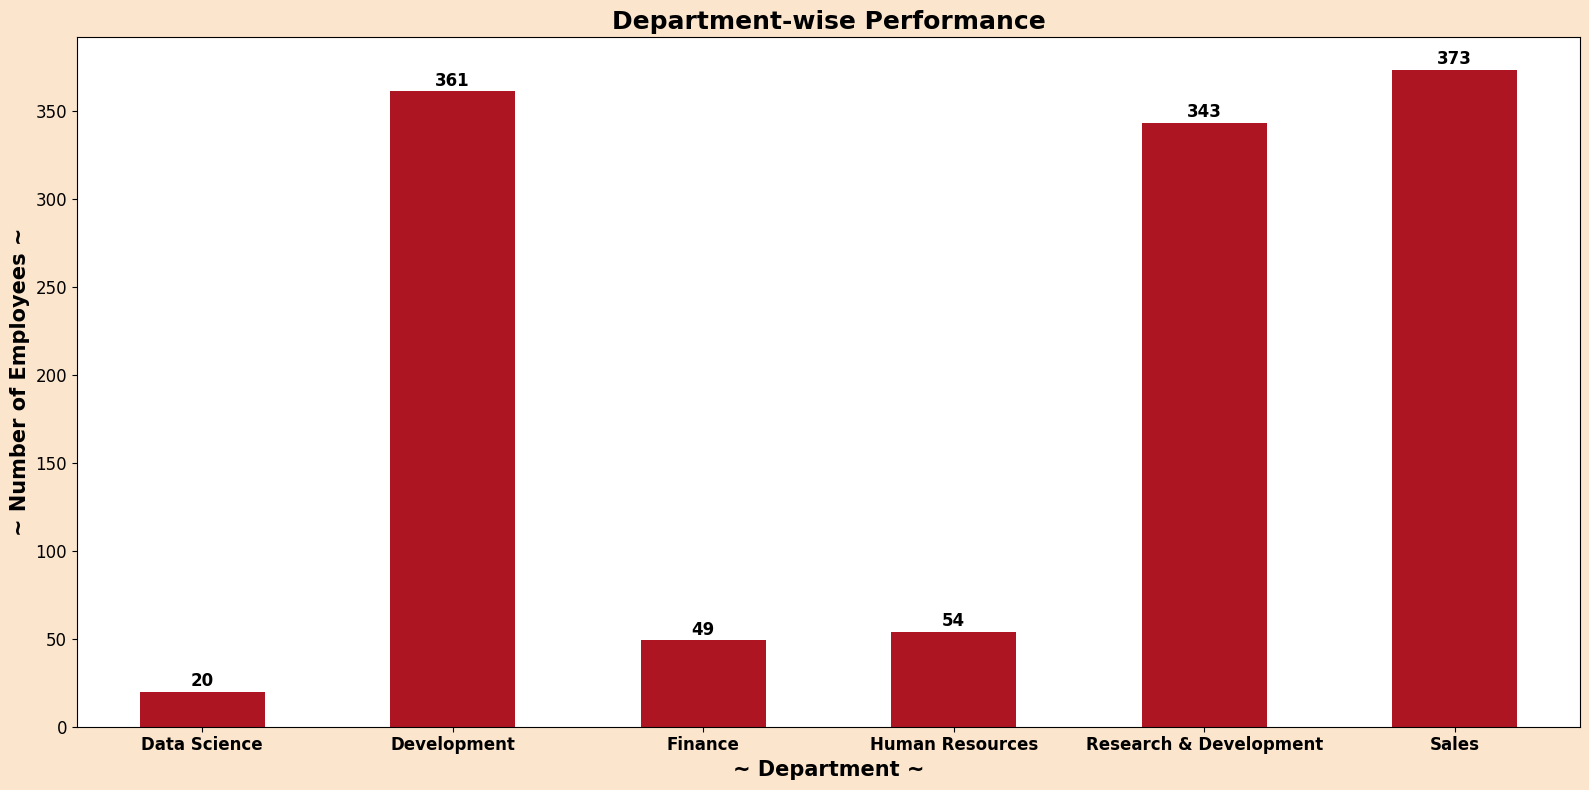

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Create crosstab
ct = pd.crosstab(df_dept['EmpDepartment'], df_dept['PerformanceRating'])

# Create figure and axis
fig, ax = plt.subplots(figsize=(16, 8))

# Set Plot background color
skin_color = '#fce5cd'
fig.patch.set_facecolor(skin_color)  # Outside plot area
ax.set_facecolor('#ffffff')         # Inside plot area

# Plot the bar chart in Cherry Red
ct.sum(axis=1).plot(kind='bar', color='#ad1522', ax=ax)  # Cherry Red

# Set title and labels
ax.set_title('Department-wise Performance',fontsize=18,fontweight='bold',color='#000000')
ax.set_xlabel('~ Department ~',fontsize=15,fontweight='bold')
ax.set_ylabel('~ Number of Employees ~',fontsize=15,fontweight='bold')
ax.set_xticks(range(len(ct.index)))
ax.set_xticklabels(ct.index, rotation=0)
# Set font size for x and y tick labels
# Set tick labels with bold font
ax.set_xticks(range(len(ct.index)))
ax.set_xticklabels(ct.index, rotation=0, fontsize=12, fontweight='bold')
ax.tick_params(axis='y', labelsize=12)

#ax.tick_params(axis='both', labelsize=12,labelweight='bold')

# Annotate bars with counts
for i, count in enumerate(ct.sum(axis=1)):
    ax.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=12,fontweight='bold')

plt.tight_layout()
plt.show()
